# Comparison based on variance explained and left hemisphere, polar angle

In [1]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi

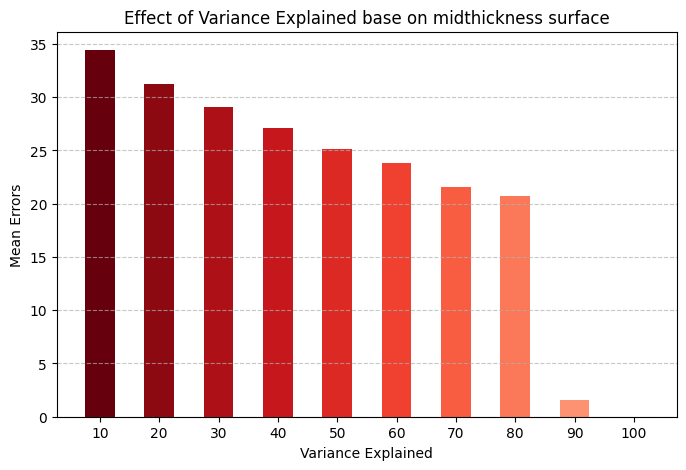

In [3]:
folder_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/'
# items = os.listdir(folder_path)
pattern = re.compile(r"^sub-wlsubj\d+$")
subjects = [
    item for item in os.listdir(folder_path)
    if os.path.isdir(os.path.join(folder_path, item)) and pattern.match(item)
]
# print(items)

# Setting thresholds
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
all_errors = []
for subject in subjects:
    empirical_path = folder_path + subject + '/surf/fs_empirical.lh.32k_fs_LR.func.gii'
    predicted_path = folder_path + subject + '/deepRetinotopy/' + subject + '.fs_predicted_polarAngle_lh_curvatureFeat_model.func.gii'
    vexpl_path = folder_path + subject + '/surf/fs_vexpl.lh.32k_fs_LR.func.gii'
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data)
    # vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    
    # Applying Mask
    # empirical_data[final_mask_L == 1] = np.reshape(empirical_data[final_mask_L == 1], (-1, 1))
    # predicted_data[final_mask_L == 1] = np.reshape(predicted_data[final_mask_L == 1], (-1, 1))
    # vexpl_data[final_mask_L == 1] = np.reshape(vexpl_data[final_mask_L == 1], (-1, 1))
    empirical_data = empirical_data[final_mask_L == 1].reshape(-1, 1)
    predicted_data = predicted_data[final_mask_L == 1].reshape(-1, 1)
    vexpl_data = vexpl_data[final_mask_L == 1]
    # vexpl_data = vexpl_data[final_mask_L == 1].reshape(-1, 1)
    
    
    # Transforming angle to radians
    angle_error = smallest_angle(empirical_data*np.pi/180, predicted_data*np.pi/180)
    
    errors = []
    for thresh in thresholds:
        mask = vexpl_data > (thresh / 100)
        errors.append(np.mean(angle_error[mask]))
        # print(f"Threshold {thresh}% - Valid Data Points: {np.sum(mask)}")
        
    errors = np.nan_to_num(errors, nan=0)
    all_errors.append(errors)
    # print(subject, errors)

all_errors = np.array(all_errors)
mean_errors = np.nanmean(all_errors, axis=0)

# Plot
colors = cm.Reds(np.linspace(1, 0.3, len(mean_errors)))
plt.figure(figsize=(8, 5))
plt.bar(thresholds, mean_errors, width=5.0, color=colors, alpha=1.0)
plt.xticks(thresholds)
plt.xlabel("Variance Explained")
plt.ylabel("Mean Errors")
plt.title("Effect of Variance Explained base on midthickness surface")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig("variance explained and errors based on white.png")
plt.show()

(array([ 43.,  90., 322., 746., 811., 714., 380., 101.,  37.,  23.]),
 array([ 27.23423576,  57.7673111 ,  88.30038452, 118.83345795,
        149.36653137, 179.89959717, 210.43267822, 240.96574402,
        271.49880981, 302.03189087, 332.56497192]),
 <BarContainer object of 10 artists>)

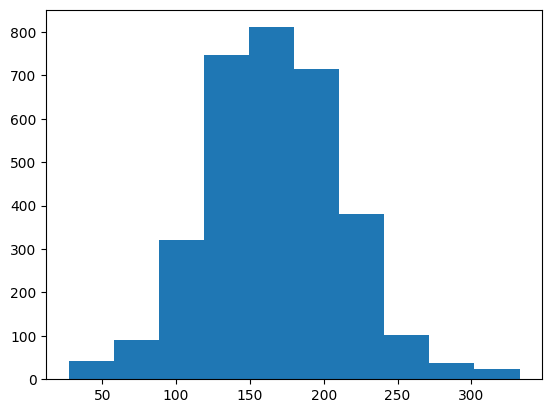

In [3]:
plt.hist(empirical_data)

(array([103., 231., 238., 292., 684., 699., 443., 361., 119.,  97.]),
 array([103.19172668, 118.21786499, 133.2440033 , 148.2701416 ,
        163.29627991, 178.32241821, 193.34855652, 208.37469482,
        223.40083313, 238.42697144, 253.45310974]),
 <BarContainer object of 10 artists>)

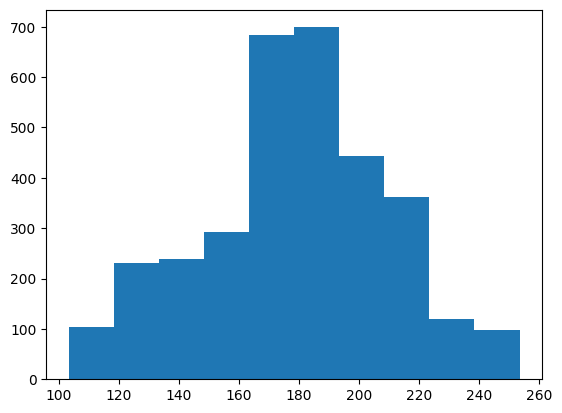

In [4]:
plt.hist(predicted_data)

# For single subject

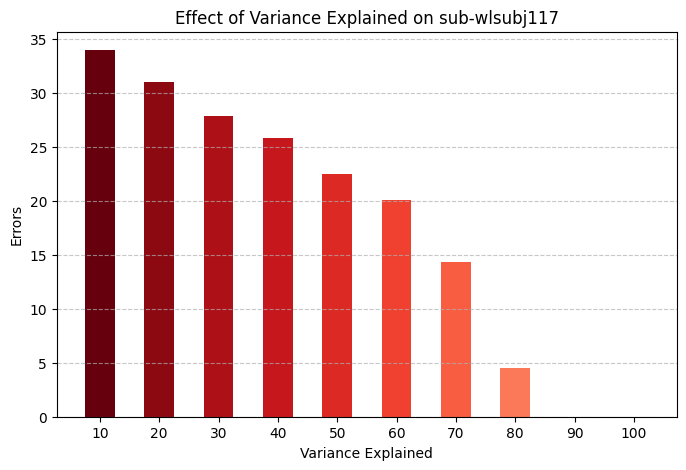

In [8]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi


subject = 'sub-wlsubj117'
empirical_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_empirical.lh.32k_fs_LR.func.gii'
predicted_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/deepRetinotopy/' + subject + '.fs_predicted_polarAngle_lh_curvatureFeat_model.func.gii'
vexpl_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_vexpl.lh.32k_fs_LR.func.gii'

# Number of nodes
number_cortical_nodes = int(64984)
number_hemi_nodes = int(number_cortical_nodes / 2)

# visual cortex mask
final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])

empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data)
# vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data).reshape(number_hemi_nodes, 1)

# Applying Mask
# empirical_data[final_mask_L == 1] = np.reshape(empirical_data[final_mask_L == 1], (-1, 1))
# predicted_data[final_mask_L == 1] = np.reshape(predicted_data[final_mask_L == 1], (-1, 1))
# vexpl_data[final_mask_L == 1] = np.reshape(vexpl_data[final_mask_L == 1], (-1, 1))
empirical_data = empirical_data[final_mask_L == 1].reshape(-1, 1)
predicted_data = predicted_data[final_mask_L == 1].reshape(-1, 1)
vexpl_data = vexpl_data[final_mask_L == 1]
# vexpl_data = vexpl_data[final_mask_L == 1].reshape(-1, 1)


# Transforming angle to radians
angle_error = smallest_angle(empirical_data*np.pi/180, predicted_data*np.pi/180)

# Setting thresholds
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
errors = []

for thresh in thresholds:
    mask = vexpl_data > (thresh / 100)
    errors.append(np.mean(angle_error[mask]))
    # print(f"Threshold {thresh}% - Valid Data Points: {np.sum(mask)}")
    
errors = np.nan_to_num(errors, nan=0)
# print('errors: ', errors)
colors = cm.Reds(np.linspace(1, 0.3, len(errors)))
plt.figure(figsize=(8, 5))
plt.bar(thresholds, errors, width=5.0, color=colors, alpha=1.0)
plt.xticks(thresholds)
plt.xlabel("Variance Explained")
plt.ylabel("Errors")
plt.title("Effect of Variance Explained on "+subject)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparison on Right Hemisphere

/home/jovyan/conda-environments/deepretinotopy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jovyan/conda-environments/deepretinotopy/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


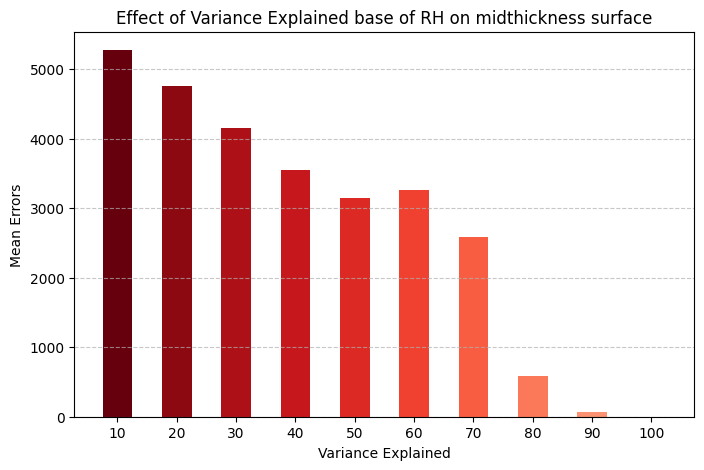

In [1]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi


folder_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_pial2mid/'
# items = os.listdir(folder_path)
pattern = re.compile(r"^sub-wlsubj\d+$")
subjects = [
    item for item in os.listdir(folder_path)
    if os.path.isdir(os.path.join(folder_path, item)) and pattern.match(item)
]
# print(items)

# Setting thresholds
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
all_errors = []
for subject in subjects:
    # empirical_path = folder_path + subject + '/surf/fs_empirical.rh.32k_fs_LR.func.gii'
    empirical_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_empirical.rh.32k_fs_LR.func.gii'
    predicted_path = folder_path + subject + '/deepRetinotopy/' + subject + '.fs_predicted_polarangle_rh_curvatureFeat_model.func.gii'
    # vexpl_path = folder_path + subject + '/surf/fs_vexpl.rh.32k_fs_LR.func.gii'
    vexpl_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_vexpl.rh.32k_fs_LR.func.gii'
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data)
    # vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    
    # Applying Mask
    # empirical_data[final_mask_L == 1] = np.reshape(empirical_data[final_mask_L == 1], (-1, 1))
    # predicted_data[final_mask_L == 1] = np.reshape(predicted_data[final_mask_L == 1], (-1, 1))
    # vexpl_data[final_mask_L == 1] = np.reshape(vexpl_data[final_mask_L == 1], (-1, 1))
    empirical_data = empirical_data[final_mask_R == 1].reshape(-1, 1)
    predicted_data = predicted_data[final_mask_R == 1].reshape(-1, 1)
    vexpl_data = vexpl_data[final_mask_R == 1]
    # vexpl_data = vexpl_data[final_mask_L == 1].reshape(-1, 1)
    
    
    # Transforming angle to radians
    angle_error = smallest_angle(empirical_data*np.pi/180, predicted_data*np.pi/180)
    
    errors = []
    for thresh in thresholds:
        mask = vexpl_data > (thresh / 100)
        errors.append(np.mean(angle_error[mask]))
        # print(f"Threshold {thresh}% - Valid Data Points: {np.sum(mask)}")
        
    errors = np.nan_to_num(errors, nan=0)
    all_errors.append(errors)
    # print(subject, errors)

all_errors = np.array(all_errors)
mean_errors = np.nanmean(all_errors, axis=0)

# Plot
colors = cm.Reds(np.linspace(1, 0.3, len(mean_errors)))
plt.figure(figsize=(8, 5))
plt.bar(thresholds, mean_errors, width=5.0, color=colors, alpha=1.0)
plt.xticks(thresholds)
plt.xlabel("Variance Explained")
plt.ylabel("Mean Errors")
plt.title("Effect of Variance Explained base of RH on midthickness surface")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig("variance explained and errors based on white.png")
plt.show()

(array([ 39.,  34., 245., 555., 630., 749., 687., 204.,  48.,  28.]),
 array([ 40.37865448,  70.39353943, 100.40842438, 130.42330933,
        160.43818665, 190.45307922, 220.46795654, 250.48284912,
        280.4977417 , 310.51260376, 340.52749634]),
 <BarContainer object of 10 artists>)

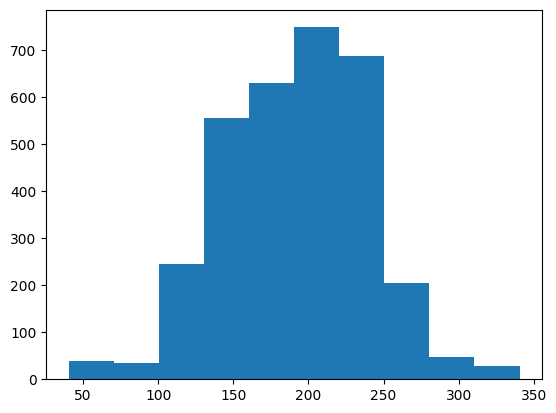

In [4]:
plt.hist(empirical_data)

(array([3065.,   46.,   19.,   19.,   14.,   14.,   13.,   11.,    9.,
           9.]),
 array([-1.00000000e+00,  8.88805859e+03,  1.77771172e+04,  2.66661758e+04,
         3.55552344e+04,  4.44442930e+04,  5.33333516e+04,  6.22224102e+04,
         7.11114688e+04,  8.00005312e+04,  8.88895859e+04]),
 <BarContainer object of 10 artists>)

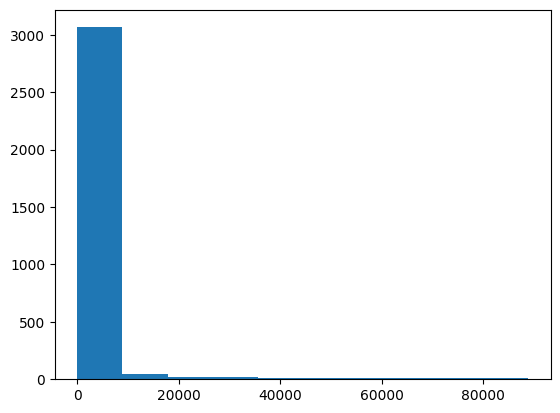

In [5]:
plt.hist(predicted_data)

# Comparison based on eccentricity, left hemisphere

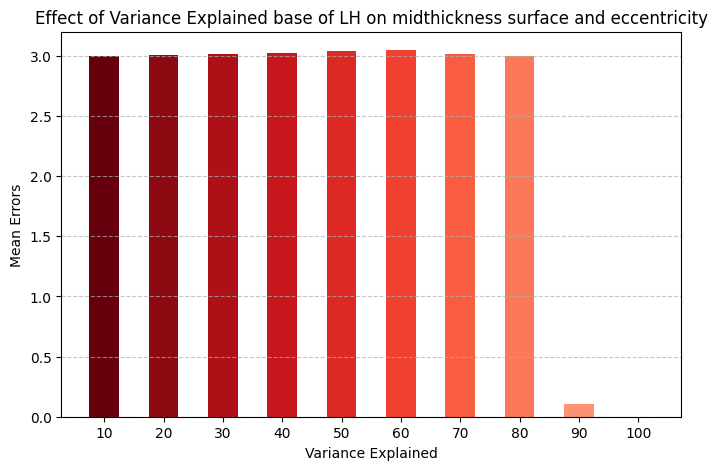

In [9]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi


folder_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/'
# items = os.listdir(folder_path)
pattern = re.compile(r"^sub-wlsubj\d+$")
subjects = [
    item for item in os.listdir(folder_path)
    if os.path.isdir(os.path.join(folder_path, item)) and pattern.match(item)
]
# print(items)

# Setting thresholds
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
all_errors = []
for subject in subjects:
    empirical_path = folder_path + subject + '/surf/fs_empirical.lh.32k_fs_LR.func.gii'
    # empirical_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_empirical.rh.32k_fs_LR.func.gii'
    predicted_path = folder_path + subject + '/deepRetinotopy/' + subject + '.fs_predicted_eccentricity_lh_curvatureFeat_model.func.gii'
    vexpl_path = folder_path + subject + '/surf/fs_vexpl.lh.32k_fs_LR.func.gii'
    # vexpl_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_vexpl.rh.32k_fs_LR.func.gii'
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data)
    # vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    
    # Applying Mask
    # empirical_data[final_mask_L == 1] = np.reshape(empirical_data[final_mask_L == 1], (-1, 1))
    # predicted_data[final_mask_L == 1] = np.reshape(predicted_data[final_mask_L == 1], (-1, 1))
    # vexpl_data[final_mask_L == 1] = np.reshape(vexpl_data[final_mask_L == 1], (-1, 1))
    empirical_data = empirical_data[final_mask_L == 1].reshape(-1, 1)
    predicted_data = predicted_data[final_mask_L == 1].reshape(-1, 1)
    vexpl_data = vexpl_data[final_mask_L == 1]
    # vexpl_data = vexpl_data[final_mask_L == 1].reshape(-1, 1)
    
    ecc_error = np.abs(empirical_data*np.pi/180 - predicted_data*np.pi/180)
    
    errors = []
    for thresh in thresholds:
        mask = vexpl_data > (thresh / 100)
        errors.append(np.mean(ecc_error[mask]))
        # print(f"Threshold {thresh}% - Valid Data Points: {np.sum(mask)}")
        
    errors = np.nan_to_num(errors, nan=0)
    all_errors.append(errors)
    # print(subject, errors)

all_errors = np.array(all_errors)
mean_errors = np.nanmean(all_errors, axis=0)

# Plot
colors = cm.Reds(np.linspace(1, 0.3, len(mean_errors)))
plt.figure(figsize=(8, 5))
plt.bar(thresholds, mean_errors, width=5.0, color=colors, alpha=1.0)
plt.xticks(thresholds)
plt.xlabel("Variance Explained")
plt.ylabel("Mean Errors")
plt.title("Effect of Variance Explained base of LH on midthickness surface and eccentricity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig("variance explained and errors based on white.png")
plt.show()

# Comparison based on eccentricity, right hemisphere

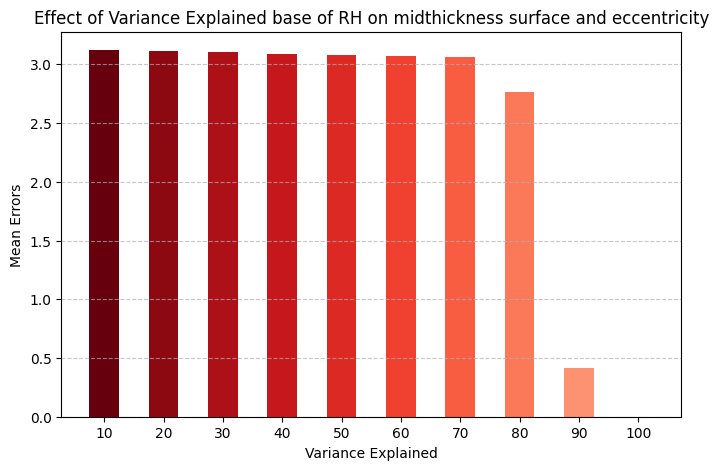

In [10]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi


folder_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/'
# items = os.listdir(folder_path)
pattern = re.compile(r"^sub-wlsubj\d+$")
subjects = [
    item for item in os.listdir(folder_path)
    if os.path.isdir(os.path.join(folder_path, item)) and pattern.match(item)
]
# print(items)

# Setting thresholds
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
all_errors = []
for subject in subjects:
    empirical_path = folder_path + subject + '/surf/fs_empirical.rh.32k_fs_LR.func.gii'
    # empirical_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_empirical.rh.32k_fs_LR.func.gii'
    predicted_path = folder_path + subject + '/deepRetinotopy/' + subject + '.fs_predicted_eccentricity_rh_curvatureFeat_model.func.gii'
    vexpl_path = folder_path + subject + '/surf/fs_vexpl.rh.32k_fs_LR.func.gii'
    # vexpl_path = '/neurodesktop-storage/nyu_retinotopy_data/freesurfer_test/' + subject + '/surf/fs_vexpl.rh.32k_fs_LR.func.gii'
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data)
    # vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    
    # Applying Mask
    # empirical_data[final_mask_L == 1] = np.reshape(empirical_data[final_mask_L == 1], (-1, 1))
    # predicted_data[final_mask_L == 1] = np.reshape(predicted_data[final_mask_L == 1], (-1, 1))
    # vexpl_data[final_mask_L == 1] = np.reshape(vexpl_data[final_mask_L == 1], (-1, 1))
    empirical_data = empirical_data[final_mask_R == 1].reshape(-1, 1)
    predicted_data = predicted_data[final_mask_R == 1].reshape(-1, 1)
    vexpl_data = vexpl_data[final_mask_R == 1]
    # vexpl_data = vexpl_data[final_mask_L == 1].reshape(-1, 1)
    
    ecc_error = np.abs(empirical_data*np.pi/180 - predicted_data*np.pi/180)
    
    errors = []
    for thresh in thresholds:
        mask = vexpl_data > (thresh / 100)
        errors.append(np.mean(ecc_error[mask]))
        # print(f"Threshold {thresh}% - Valid Data Points: {np.sum(mask)}")
        
    errors = np.nan_to_num(errors, nan=0)
    all_errors.append(errors)
    # print(subject, errors)

all_errors = np.array(all_errors)
mean_errors = np.nanmean(all_errors, axis=0)

# Plot
colors = cm.Reds(np.linspace(1, 0.3, len(mean_errors)))
plt.figure(figsize=(8, 5))
plt.bar(thresholds, mean_errors, width=5.0, color=colors, alpha=1.0)
plt.xticks(thresholds)
plt.xlabel("Variance Explained")
plt.ylabel("Mean Errors")
plt.title("Effect of Variance Explained base of RH on midthickness surface and eccentricity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig("variance explained and errors based on white.png")
plt.show()